# Uber Fare Prediction
### Dataset used : [`Uber Fares Dataset`](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset) 

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import geopy.distance

In [3]:
os.listdir('./dataset')

['wm.png',
 'processed_data.csv',
 'uber.csv',
 'uber-fares-dataset.zip',
 'image.png']

In [4]:
path = "./dataset/uber.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "key"], inplace=True)

# Convert pickup_datetime to datetime format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors='coerce', utc=True)
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')

In [ ]:
# Filter out incorrect fare values (negative and unrealistically high fares)
df = df[(df["fare_amount"] > 0) & (df["fare_amount"] < 500)]

In [ ]:
df.value_counts()

fare_amount  pickup_datetime            pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count
499.00       2011-04-10 04:10:00+00:00  -73.968377        40.764602        -73.968368         40.764600         1                  1
0.01         2010-03-08 18:44:57+00:00  -74.000523        40.725868        -73.956960         40.780855         1                  1
             2015-05-31 16:13:41+00:00  -73.991692        40.770802        -73.991692         40.770824         1                  1
0.11         2010-03-07 19:11:43+00:00  -73.997221        40.721345        -73.997252         40.721344         1                  1
2.50         2009-01-02 12:26:51+00:00  -73.994285        40.754210        -73.993981         40.754157         1                  1
                                                                                                                                  ..
             2009-01-25 07:48:37+00:00  -74.007436        40.733270       

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

We can't really do much about the missing drop off location as there is no way to predict that, better to just not consider that ride

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [ ]:
#Checking number of unique rows in each feature

target = 'fare_amount'
nu = df.drop([target], axis=1).nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df.drop([target], axis=1).shape[1]):
    if nu.values[i]<=24:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 6 numerical & 1 categorical features.


In [ ]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
df['Hourly_Segments'] = df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

df['Distance']=[round(geopy.distance.distance((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).m,2) for i in df.index]

df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

original_df = df.copy(deep=True)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,weekday,Monthly_Quarter,Hourly_Segments
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1681.11,2015,3,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2454.36,2009,4,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5039.60,2009,0,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1661.44,2009,4,Q2,H3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4483.73,2014,3,Q3,H5


In [ ]:

#Checking number of unique rows in each feature

nu = df.drop([target], axis=1).nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df.drop([target], axis=1).shape[1]):
    if nu.values[i]<=24:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 5 categorical features.


In [ ]:
import math

                                 Numeric Features Distribution                                  


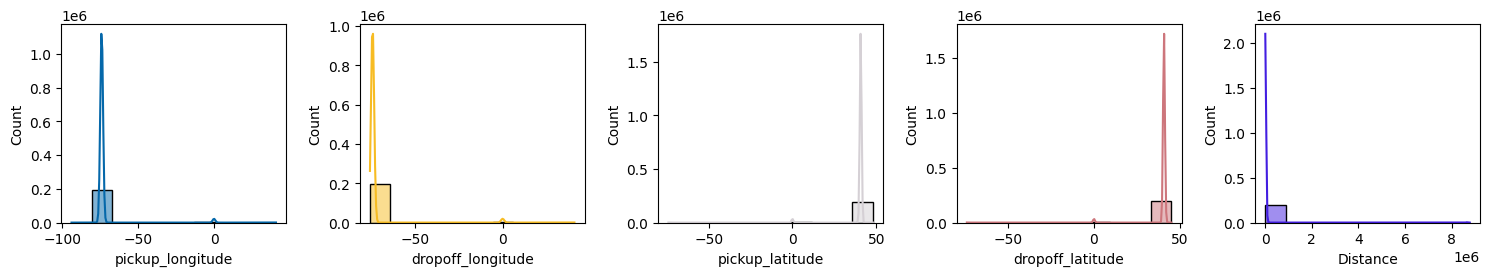

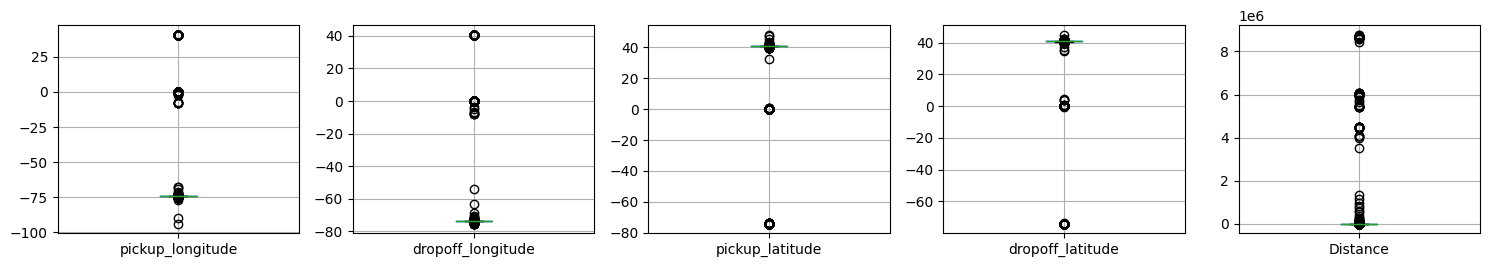

In [ ]:
print('\033[1mNumeric Features Distribution'.center(100))

n=5

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.histplot(df[nf[i]],kde=True, bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)
df.drop(['pickup_latitude','pickup_longitude',
         'dropoff_latitude','dropoff_longitude'],axis=1)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 109


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
df.dropna(inplace=True)

                   Total Null Values  Percentage
fare_amount                        0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
dropoff_longitude                  0         0.0
dropoff_latitude                   0         0.0
passenger_count                    0         0.0
Distance                           0         0.0
year                               0         0.0
weekday                            0         0.0
Monthly_Quarter                    0         0.0
Hourly_Segments                    0         0.0


In [ ]:
#Converting categorical Columns to Numeric

df1 = df.copy()
df3 = df1.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape


Dummy Encoding on features:
Monthly_Quarter
Hourly_Segments
year
weekday
passenger_count


(199856, 33)

In [ ]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1681.11,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2454.36,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
2,12.9,-74.005043,40.740770,-73.962565,40.772647,5039.60,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1661.44,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,4.9,-73.969019,40.755910,-73.969019,40.755910,0.00,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False



Inference:
Before removal of outliers, The dataset had 199856 samples.
After removal of outliers, The dataset now has 163190 samples.


In [ ]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')


Inference: After the cleanup process, 36775 samples were dropped, while retaining 18.39% of the data.


In [ ]:
df.to_csv('./dataset/processed_data.csv', index=False)